In [1]:
import pandas as pd
import numpy as np
import math
import locale
import matplotlib.pyplot as plt
%matplotlib inline

# This data set contains data on the 38 most popular car models from 1999 to 2008.  I want you to build a linear regression model to predict the highway fuel economy (hwy) of a car using the following variables.

- displ: The engine displacement, in liters.
- cyl: The number of cylinders.
- cty: The city fuel economy.

You must build your model from scratch.  No Sci-Kit Learn, or any other APIs.  Fit the model and report the R-squared value.  You may engineer nonlinear features, if you think this would improve the performance of your model.

只用hwy 和 displ，cyl 和 cty 做比较

In [2]:
df = pd.read_csv('./fuel_economy.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
y =  df['hwy']

In [4]:
x = df[['displ','cyl','cty']]


In [5]:
w = np.linalg.solve(x.T.dot(x), x.T.dot(y))
y_hat = x.dot(w)

In [6]:
R2 = 1 - (y - y_hat).dot(y-y_hat) / (y - y.mean()).dot(y-y.mean())

print("R-Squared: {}".format(R2))

R-Squared: 0.9146815178845065


#  下面的是用hwy 和所有的数据做比较

In [7]:
#d_manufacturer = pd.get_dummies(df.manufacturer)
#d_manufacturer

In [8]:
#d_model = pd.get_dummies(df.model)
#d_model

In [9]:
def OLS(y,y_hat):
    return (y - y_hat).dot(y - y_hat)

def R2 (y, y_hat):
    return 1 - OLS(y, y_hat) / OLS(y,y.mean())

In [10]:
dummies = pd.get_dummies(df)
dummies.drop('hwy',axis='columns',inplace=True)
dummies.head()

,displ,year,cyl,cty,manufacturer_audi,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,...,fl_e,fl_p,fl_r,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
0,1.8,1999,4,18,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,1.8,1999,4,21,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2.0,2008,4,20,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2.0,2008,4,21,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2.8,1999,6,16,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [11]:
y =  df.hwy
x = dummies


In [12]:
#X = (x - x.min()) / (x.max() - x.min())

In [13]:
x = (x - x.min()) / (x.max() - x.min())

X = np.vstack([np.array([1]*(x.shape[0])), x.T]).T



In [14]:
w2 = np.linalg.solve(X.T.dot(X), X.T.dot(y))

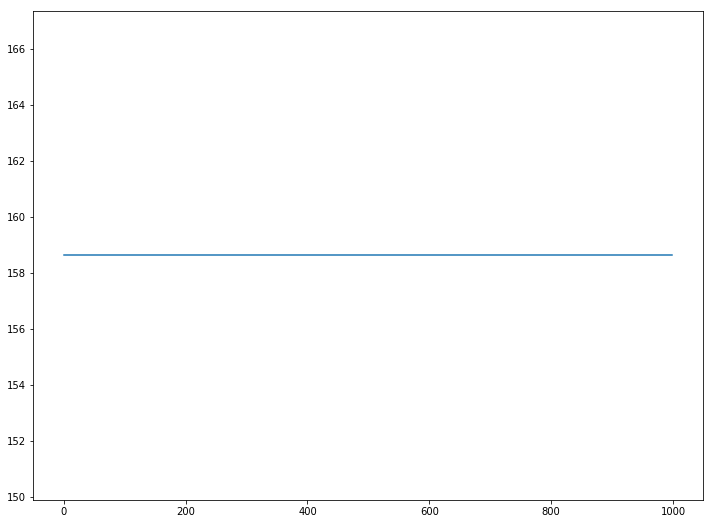

In [15]:
# J is of OLS
J=[]
eta = 1e-10
epochs = 1000

for i in range ( epochs):
    y_hat2 = X.dot(w2)
    J.append(OLS(y,y_hat2))
    w2 -= eta*X.T.dot(y_hat2 - y)

plt.figure(figsize= (12,9))

plt.plot(J)




In [16]:
print ("R-Squared {}".format(R2(y,y_hat2)))

R-Squared 0.98079916384169


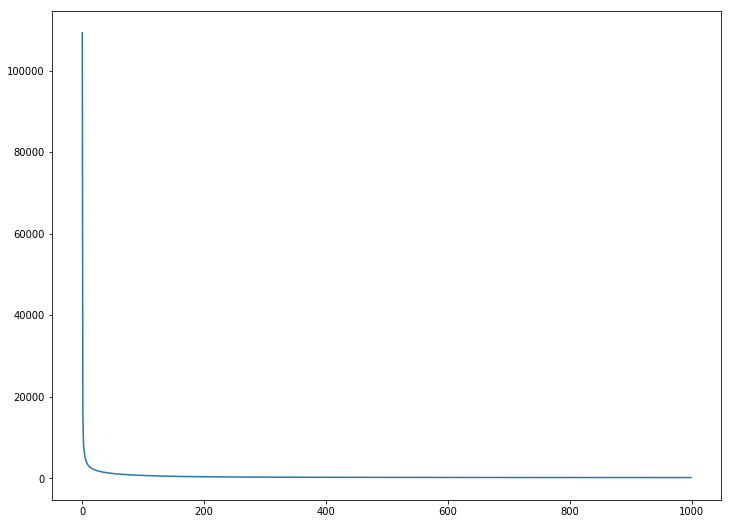

In [20]:
w = np.random.randn(X.shape[1])
# J is of OLS
J=[]
eta = 1e-3
epochs = 1000

for i in range ( epochs):
    y_hat = X.dot(w)
    J.append(OLS(y,y_hat))
    w -= eta*X.T.dot(y_hat - y)

plt.figure(figsize= (12,9))

plt.plot(J)

In [18]:
print ("R-Squared {}".format(R2(y,y_hat)))

R-Squared nan
